# Exploratory Data Analysis (EDA)

## Here is the breief what I am gonna do 

##### 1st: Understand the data, it's feature and what's the features all about
##### 2nd: Plotting Graphs to understand more about data (PDF, CDF, Box plot, violin plot, Univariate, Bi & Multivariate, scatter plot, Pair Plot, Classify Dead and alive persons)
##### 3rd: Making some conclusions on what we observed 
##### 4th: Google It For More
##### 5th: Submit

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
# Understanding The Data
# So Before Dive in We have to load the dataset with Panda and load as DataFrame. 
# It will help us to read manipulate and categorize data easyily. 
# .. Importing All necessary Lib to work with

import numpy as np               # Lib for Mathmetical Calculations
import pandas as pd              # Lib for Data analysis
import matplotlib.pyplot as plt  # Lib for Ploting data in graphs
import seaborn as sns            # same as matplot lib but more beautiful and simple 

import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# as our libs are loaded now we can load our dataset 

habermanDF = pd.read_csv('haberman.csv')

In [3]:
# Let's look inside how the data looks like with header around 10 fields

habermanDF.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
# https://www.kaggle.com/gilsousa/habermans-survival-data-set/
# As per above Link for the dataset descriptions as below:
# age    -   Patients age at the time of operation
# year   -   On Which Year patients got operation (like if 64 -- value clould be like 1964)
# nodes  -   Positive axillary nodes detected 
# status -   Class 1 - Who live more then 5 yrs or more and Class 2 - Couldn't make it, less then 5 yrs

# columns
habermanDF.columns


Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
# Shape (It says what's the column and row count for this dataframe, features too )
habermanDF.shape

(306, 4)

In [6]:
# So looks like we have 306 count of data to work with and having 4 features like age, year, nodes, status

In [7]:
# And status is our classification feature so let's see what's the count of each classes
habermanDF.status.value_counts()

1    225
2     81
Name: status, dtype: int64

In [8]:
# Min, Max, Mean, Median. describing dataset
habermanDF.describe()

# Got every Features data min age of 30yrs max age of 83 age with node 0 to 52 

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
# More Info on dataset
habermanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


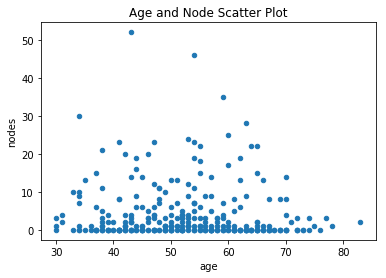

In [10]:
# Looks like 85 people couldn't make it for more then 5 years SAD :( Good News 225 people lived long
# let's have a scatter plot with age and nodes to check if they concludes any points

habermanDF.plot(kind='scatter', x='age', y='nodes') 
plt.title('Age and Node Scatter Plot')
plt.show()


# Conclusion from scatter Plot
# It looks like more people have nodes less then around 15 nodes ir-respective of age

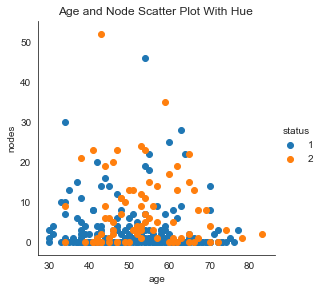

In [11]:
# Didn't get much idea to what to do with scatter plot result.. so refered from given EDA analysis wiht IRIS dataset

sns.set_style("white")
sns.FacetGrid(habermanDF, hue="status", height=4).map(plt.scatter, "age", "nodes").add_legend()
plt.title('Age and Node Scatter Plot With Hue ')
plt.show()




In [12]:
habermanDF['status'] = habermanDF['status'].map({1:'survived', 2:'dead'})
habermanDF.head()

,age,year,nodes,status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


##### Conclusion from scatter Plot with Hue
* same as before, It looks like more people have nodes less then around 15 nodes ir-respective of age

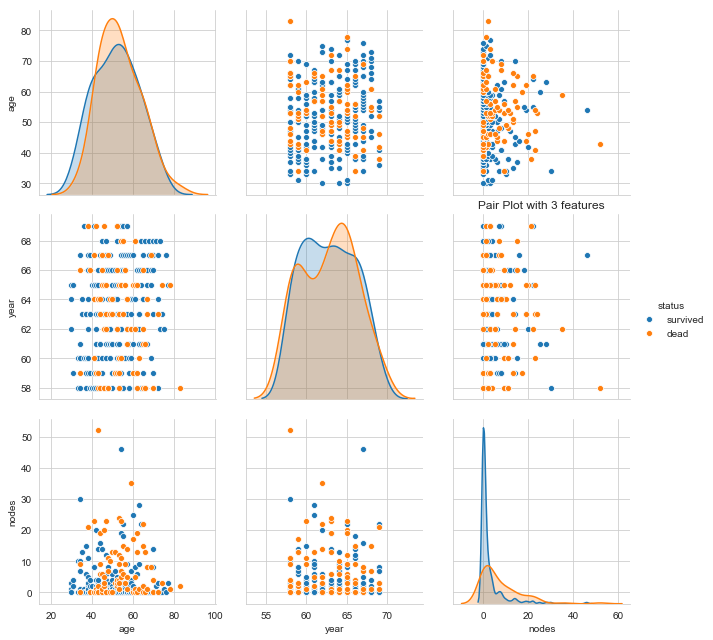

In [13]:
# Let's see if Age matter or not and nodes as well.. it could be perfect fit for a pair plot 
# We can do pair plot cause all the values are in numerical values 

# plt.close()
# sns.set_style("whitegrid")
# sns.pairplot(habermanDF, height=4, hue="status")
# plt.show()

plt.close();
sns.set_style('whitegrid');
sns.pairplot(habermanDF, hue = 'status', size = 3)
plt.title('Pair Plot with 3 features')
plt.show()


##### Observations
* As per graphs data is not seperable easily (Linear seperabale)
* THe only useful data look like node with age and year


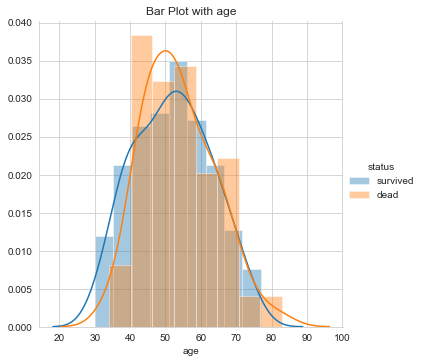

In [14]:
# Histogram, PDF, CDF
# AGE Feature

sns.FacetGrid(habermanDF, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Bar Plot with age')
plt.show();




##### observations
* There is huge area of overlaping for class 1 and class 2 for Age feature. So we can for here age doesn't matter for surviving
* but from age 40 - 60 people have died more then other

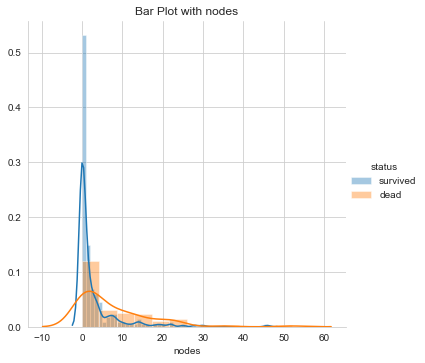

In [15]:
# Histogram, PDF, CDF
# node Feature

sns.FacetGrid(habermanDF, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title('Bar Plot with nodes')
plt.show()




##### observations
* There is High peak at around 0.. and it's blue in color it means who have 0 nodes might get a chance to live longer

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


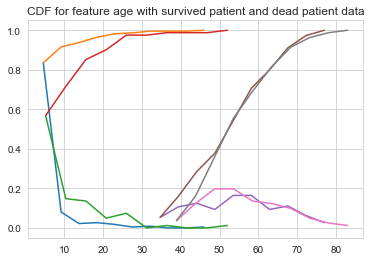

In [16]:
# PDF, CDF
habermanDF_1 = habermanDF.loc[habermanDF["status"] == "survived"]
habermanDF_2 = habermanDF.loc[habermanDF["status"] == "dead"]


# Survived Patients nodes
counts, bin_edges = np.histogram(habermanDF_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Not Survived Patients nodes
counts, bin_edges = np.histogram(habermanDF_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Survived Patients age
counts, bin_edges = np.histogram(habermanDF_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Not Survived Patients age
counts, bin_edges = np.histogram(habermanDF_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.title('CDF for feature age with survived patient and dead patient data')





plt.show();


# Observation

In [17]:
# We got the Percentiles and Quantiles data in Describe too



#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(habermanDF_1["nodes"]))
print(np.median(habermanDF_2["nodes"]))


print("\nQuantiles:")
print(np.percentile(habermanDF_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(habermanDF_2["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(habermanDF_1["nodes"],90))
print(np.percentile(habermanDF_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(habermanDF_1["nodes"]))
print(robust.mad(habermanDF_2["nodes"]))





Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


##### Observations:
* nMedians, Median Absolute Deviation get 0.0 cause most of the 0 node people survived as per data.

In [18]:
# OR we can get good amount of calculations with default way i.e .describe()

habermanDF.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


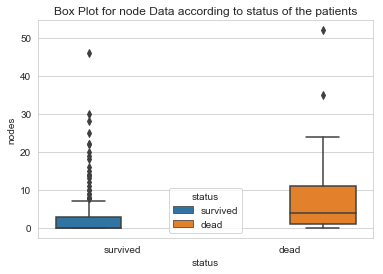

In [19]:
# Let visualize what we have calculated.

sns.boxplot(x='status',y='nodes', data=habermanDF, hue="status")
plt.title('Box Plot for node Data according to status of the patients')
plt.show()



##### observations for Box plots for nodes with status:
* for class 1 (Who survived) most of the people have node 0. and with that their median line and min line are same
* for class 2 (who didn't survive) their median at around 4. and 75 percentile is around 11. 
* for class 2 But that doesn't proove if the patients have 0 node he will survive. cause class 2 min value have as 0 nodes
* God gifted people those who survived with node around 46 

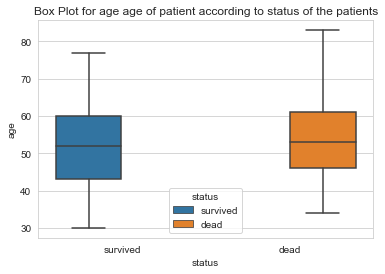

In [20]:
# Let's box plot for ages of the patients to status

sns.boxplot(x='status',y='age', data=habermanDF, hue="status")
plt.title('Box Plot for age age of patient according to status of the patients')
plt.show()

##### Box plots for age with status
* The Youngest patient was age of 30 yrs and eldest was more then 80 yrs
* Both survived and not survived medians are mostly similar that means age didn't put much effect of surviving
* Youngest person who couldn't make it is with around 34 yrs and eldest was eldest of all patients.

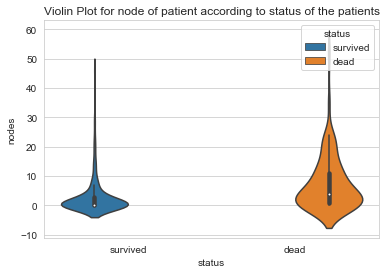

In [21]:
# Let's visualize these box plots with diffrent way (with pdfs) i.e violin plot

sns.violinplot(x="status", y="nodes", data=habermanDF, size=5, hue="status")
plt.title('Violin Plot for node of patient according to status of the patients')
plt.show()

##### Box plots for nodes with status
* nothing more drastic diffrences here. Just nice to see both plots together.
* Just One point though People who survived and not survived they didn't have much diffrence in nodes. cause both graph peaks are 0 to 5 

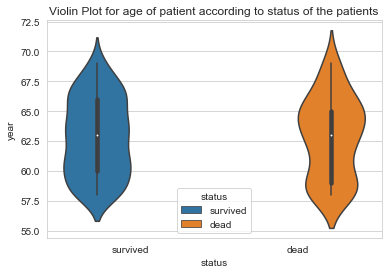

In [22]:
# Just added violin plot for year to status
sns.violinplot(x="status", y="year", data=habermanDF, size=5, hue="status")
plt.title('Violin Plot for age of patient according to status of the patients')
plt.show()

##### Violin plot for year to status

* Just checking if may missed any points with year . but it looks like people have survived kinda eqal amount of patients in each year. (making this statement by varience in blue graph and the raise is similiar to flat plane)
* and in year of 1961 less people have died and in year of 1966 more.

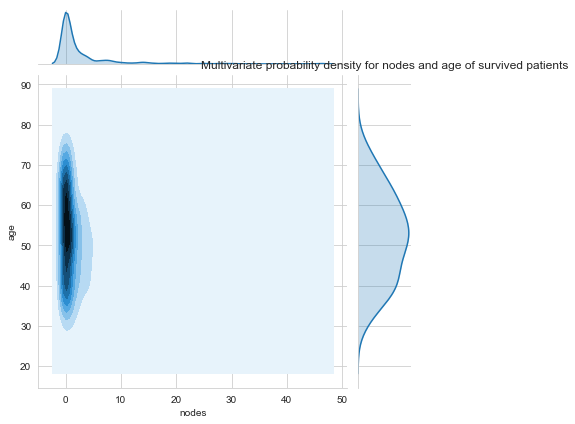

In [23]:
# Multivariate probability density, contour plot
sns.jointplot(x="nodes", y="age", data=habermanDF_1, kind="kde")
plt.title('Multivariate probability density for nodes and age of survived patients')
plt.show()

##### observation for Multivariate probability density Plot
* what you can say more.. More dark place was near to node 0 and age from 48 - 68 
* valley was clearly showing the person who has survived

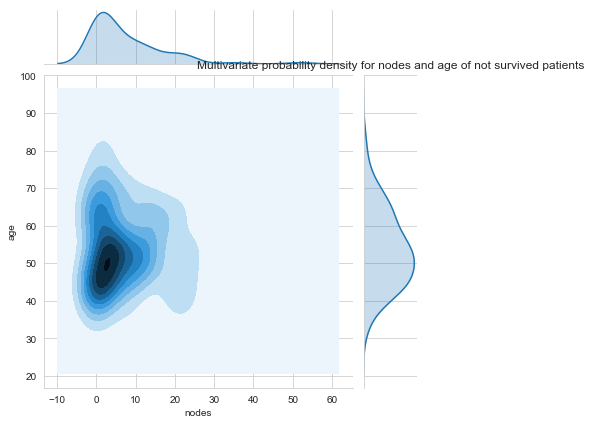

In [24]:
# Multivariate probability density, contour plot
sns.jointplot(x="nodes", y="age", data=habermanDF_2, kind="kde")
plt.title('Multivariate probability density for nodes and age of not survived patients')
plt.show();

##### observation for Multivariate probability density Plot
* I will not say a huge change but the ranges of nodes have increased means not only the persons have 0 -10 nodes has died but also node 20+, Which was not the case in survived people

### All That I came to know about this Dataset.

** About Features

1. Nodes are little important feature then others like age and year of operation
2. Age Doesn't matter that much for status cause, diffrent age people have faced death and more of them survived.

** Findings

1. Its looks like patients from age group of 40 - 50 died evevn if they have node 0
2. More people have died in the year of 1962 - 1966.
3. Patients have Avg age of 53 - 54 years
4. The People who survived get less then 5 nodes approx.
5. Only 2 people died having node more then 30. And from survive list only one people have node more then 30 node
